# **Task 1: Stock Prediction**
Take stock price of any company you
want and predicts its price by using LSTM.<br>
Use only Jupyter notebook code.

Name: Vibinraj Rajesh Kumar

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
data = pd.read_csv('Microsoft_Stock.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [ ]:
df.shape

(1511, 6)

In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [ ]:
#checking for the null values
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
data = data['Close'].values
data = data.reshape(-1, 1)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [ ]:
# Split the data into training and testing sets
training_size = int(len(data) * 0.7)
test_size = len(data) - training_size
train_data, test_data = data[0:training_size, :], data[training_size:len(data), :]

In [ ]:
# Create dataset matrix for training and testing
def create_dataset(dataset, time_step=1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        data_X.append(a)
        data_Y.append(dataset[i + time_step, 0])
    return np.array(data_X), np.array(data_Y)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(100, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
15/15 [==============================] - 9s 194ms/step - loss: 0.0125
Epoch 2/100
15/15 [==============================] - 4s 249ms/step - loss: 0.0016
Epoch 3/100
15/15 [==============================] - 3s 178ms/step - loss: 9.2125e-04
Epoch 4/100
15/15 [==============================] - 3s 180ms/step - loss: 6.8450e-04
Epoch 5/100
15/15 [==============================] - 3s 179ms/step - loss: 6.7096e-04
Epoch 6/100
15/15 [==============================] - 4s 269ms/step - loss: 6.0479e-04
Epoch 7/100
15/15 [==============================] - 3s 181ms/step - loss: 5.3493e-04
Epoch 8/100
15/15 [==============================] - 3s 179ms/step - loss: 5.8779e-04
Epoch 9/100
15/15 [==============================] - 3s 180ms/step - loss: 5.4302e-04
Epoch 10/100
15/15 [==============================] - 3s 237ms/step - loss: 5.7937e-04
Epoch 11/100
15/15 [==============================] - 3s 202ms/step - loss: 5.4327e-04
Epoch 12/100
15/15 [==============================] - 3s 181

In [ ]:
# Predicting the test data
test_predict = model.predict(X_test)
test_predict = scaler.inverse_transform(test_predict)

12/12 [==============================] - 2s 37ms/step


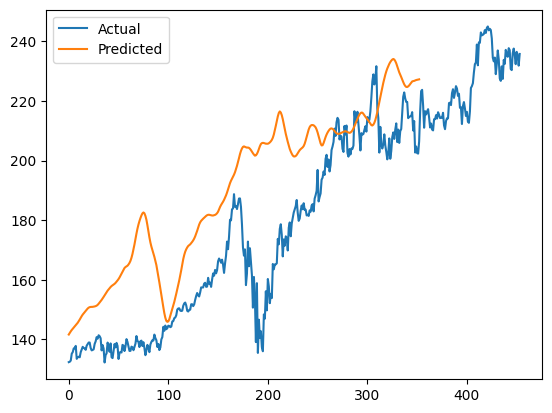

In [ ]:
# Plotting the test predictions
plt.plot(scaler.inverse_transform(test_data), label='Actual')
plt.plot(test_predict, label='Predicted')
plt.legend()
plt.show()